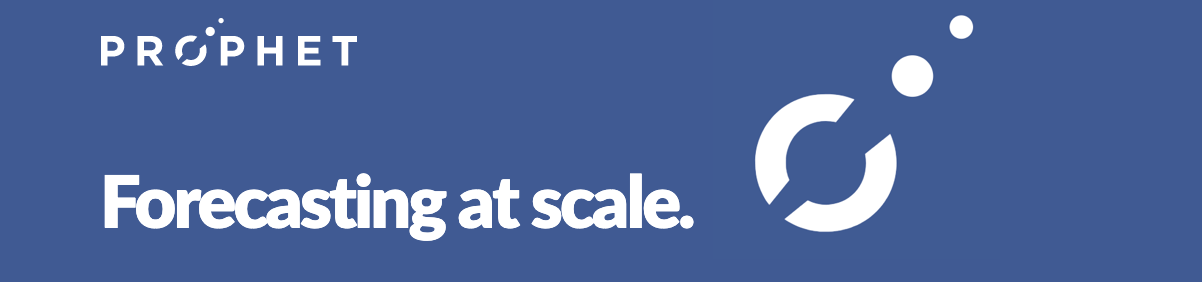

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

Prophet is a forecasting procedure implemented in R and Python. It is fastand provides completly automated forecasts that can be tuned by hand by data scientists and analysts.

Prophet is open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.

Prophet is used in many applications across Facebook for producing reliable forecasts for planning and goal setting. They’ve found it to perform better than any other approach in the majority of cases.

Prophet is robust to outliers, missing data, and dramatic changes in your time series.

The Prophet procedure includes many possibilities for users to tweak and adjust forecasts. You can use human-interpretable parameters to improve your forecast by adding your domain knowledge.

They’ve implemented the Prophet procedure in R and Python, but they share the same underlying Stan code for fitting. Use whatever language you’re comfortable with to get forecasts.

Source: https://facebook.github.io/prophet/

We'll be using Air Passengers per month, [Air Passengers](https://www.kaggle.com/rakannimer/air-passengers). The task is to forecast the "Number of Passengers" column in the dataset

# Import Libraries and datasets

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from datetime import datetime
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('../input/air-passengers/AirPassengers.csv')

## Exploratory Data Analytics


In [ ]:
df.head()

Checking for null values

In [ ]:
df.isnull().sum()

In [ ]:
print("Number of rows in dataset:",df.shape[0])
print("Number of Columns in dataset:",df.shape[1])

In [ ]:
df.info()

Here, we can see that there is no null values in dataset and **Month** column is in string type instead of datetime.

In [ ]:
df['Month']=pd.to_datetime(df['Month'],infer_datetime_format=True,format='%y%m')

Installing Prophet using pip and import prophet

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

For using **Prophet**, Dataframe must have columns "ds" and "y" with the dates and values respectively.

In [ ]:
df.rename(columns={'Month':'ds','#Passengers':'y'},inplace=True)

In [ ]:
df.head()

We fit the model by instantiating a new Prophet object. Any settings to the forecasting procedure are passed into the constructor. Then you call its fit method and pass in the dataframe.

In [ ]:
model = Prophet()
model.fit(df)

Predictions are then made on a dataframe with a column ds containing the dates for which a prediction is to be made. You can get a suitable dataframe that extends into the future a specified number of months using the helper method Prophet.make_future_dataframe. By default it will also include the dates from the history, so we will see the model fit as well.

In [ ]:
future = model.make_future_dataframe(periods=0, freq='M')
future.tail()

The predict method will assign each row in future a predicted value which it names `yhat`. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column `yhat` with the forecast, as well as columns for components and uncertainty intervals.

In [ ]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

You can plot the forecast by calling the Prophet.plot method and passing in your forecast dataframe.

In [ ]:
fig1 = model.plot(forecast)


In [ ]:
fig2 = model.plot_components(forecast)

An interactive figure of the forecast and components can be created with plotly. You will need to install plotly 4.0 or above separately, as it will not by default be installed with prophet.

In [ ]:
!pip install plotly

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [ ]:
plot_components_plotly(model, forecast)
